<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Processamento de Imagem e Visão (PIV)</h3>
<h3>1º Trabalho Laboratorial – Contagem e Classificação de Peças de Lego Retangulares </h3>
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: João Pedro Costa <br>
<br>
27 de Outubro 2024
</center>


***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>

- [Introdução;](#section1)
- [Desenvolvimento;](#section2)
    - [Leitura de imagens](#subsection1)
       - [Observações sobre as imagens](#subsubsection1)
    - [Alteração de cor em determinadas peças](#subsection2)
    - [Conversão para tons de cinzento e Histograma](#subsection3)
       - [Observações sobre a conversão para cinzento e o histograma](#subsubsection2)
    - [Binarização](#subsection4)
       - [Observações sobre o processo de binarização](#subsubsection4)
    - [Operações morfológicas](#subsection5)
       - [Observações sobre as operações morfológicas](#subsubsection5)
    - [Extracção de componentes conexos e prioridades](#subsection6)
       - [Observações sobre os resultados das extrações de componentes](#subsubsection6)
    - [Classificação de Objetos](#subsection7)
       - [Médias dos tamanhos das diferentes peças de lego](#subsubsection7)
       - [Teste das funções de classificador](#subsubsection8)
    - [Teste Final e Resultados](#subsection8)
- [Conclusão;](#section3)
- [Bibliografia;](#section4)


***
<a id='section1'></a>
## <center><b>Introdução</b></center>
<div style="text-align: justify">
<h3> Enquadramento </h3>

No contexto da Unidade Curricular de Processamento de Imagem e Visão, foi proposto como primeiro trabalho prático o desenvolvimento de um algoritmo capaz  de  contar  automaticamente  o  número de peças de Lego retangulares, colocado em cima de uma mesa;<br>
    
Este projeto tem como objetivo consolidar o conhecimento prévio da biblioteca de funções OpenCV, e aplicar os novos conhecimentos que adquirimos nas aulas práticas, tais como a identificação e classificação de objetos, para programação de aplicações de visão por computador em tempo real.<br>

<h3> Objetivo </h3>

Pretende-se desenvolver um algoritmo para contagem das peças retangulares de lego
(dimensões  “2x2”, “2x4”, “2x6” e ”2x8”),  colocadas  em  cima  de  uma  mesa  de  superfície homogénea e clara, observadas por uma câmara, montada num tripé, ajustada de modo que o plano  do  sensor  seja  paralelo  ao  plano  da  mesa.

O algoritmo deverá possuir alguma robustez relativamente às seguintes perturbações:  
(i) presença de outras peças de Lego no campo de visão; (ii) existência de sombras; (iii) eventual
contacto entre peças

<h3> Métodos </h3>

Para o desenvolvimento do algoritmo, foram fornecidas várias imagens como parte do "Conjunto de Treino", que servirão para treinar o algoritmo. Posteriormente, os docentes usarão um "Conjunto de Teste" para avaliar o desempenho do algoritmo, e por isso é fundamental assegurar que este funciona bem para todo o conjunto de treino, de modo a tentar minimizar qualquer problema que possa surgir mais tarde na fase de teste.<br>

Neste relatório, detalharemos o processo de implementação do algoritmo passo a passo, apresentando os resultados obtidos para todas as imagens fornecidas com as devidas justificações, para facilitar a compreensão do funcionamento do algoritmo.
</div>

# Processo

<img src="process.png" width="500">

#### Binarização:

A imagem original é convertida em uma imagem binária, onde os pixels são transformados em preto (valor 0) ou branco (valor 1), dependendo de um limiar (threshold).


#### Operadores Morfológicos:

São operações aplicadas à imagem binária para melhorar a segmentação dos objetos. Dois operadores comuns e que foram utilizados neste trabalho são a dilatação e a erosão. Eles ajudam a eliminar pequenas imperfeições e a separar objetos que estão próximos.

#### Etiqueta (Labeling):

Nesta etapa, os objetos identificados na imagem binária são etiquetados, permitindo sua identificação individual no processamento subsequente.

#### Extração de Características:

Para cada objeto etiquetado, são extraídas características relevantes, como forma, tamanho, área, contorno, etc. Estes dados serão usados na classificação dos objetos.

#### Classificação:

Com base nas características extraídas, os objetos são classificados em diferentes categorias ou classes (neste caso peças de Lego 2x2, 4x2, 6x2, 8x2 ou objeto).

### Imports

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

***
<a id='section2'></a>
# <center><b>Desenvolvimento</b></center>
<div style="text-align: justify">

<a id='subsection1'></a>
# <center><b>Leitura de imagens</b></center>
<div style="text-align: justify">

Para iniciar o trabalho foi necessário ler as imagens de treino e guardar num array para depois poderem ser utilizadas nos próximos passos do trabalho. Após guardar as imagens no array foi então criado um plot para as podermos visualizar.

A diretoria da pasta para teste está comentada.

Para alterar das imagens de treino para teste é apenas necessário colocar as imagens de teste na pasta, comentar a diretoria de treino e descomentar a diretoria de teste.

In [2]:
#Diretoria das imagens de treino
images_dir = 'treino/'
#Diretoria das imagens de teste
#Necessário colocar as imanges na pasta primeiro
# images_dir = 'teste/'
images = []
#Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

#Ler as imagens de treino e adicionar ao array 'images'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        images.append(img)
    else:
        print("Unable to read image:", image_file)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino")
plt.axis('off')

for i, image in enumerate(images[:14]):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

<a id='subsubsection1'></a>
### <center><b>Observações sobre as imagens</b></center>
<div style="text-align: justify">

Antes de iniciar os passos necessários para a classificação das peças de Lego, foi essencial compreender as características de cada tipo de peça e determinar se são efetivamente objetos ou peças de lego, de modo a definir como o classificador deve funcionar e quais os resultados esperados para cada imagem de treino.

Desta forma os resultados esperados para cada imagem são os seguintes:

| Imagem | Número total de objetos  | 2x2 | 4x2 | 6x2 | 8x2 | Objetos |    
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 9 | 4 | 3 | 0 | 1 | 1
| 2 | 6 | 2 | 2 | 0 | 1 | 0
| 3 | 3 | 2 | 1 | 0 | 0 | 0
| 4 | 4 | 0 | 2 | 0 | 2 | 0
| 5 | 3 | 0 | 1 | 0 | 1 | 1
| 6 | 3 | 0 | 2 | 0 | 1 | 0
| 7 | 3 | 1 | 0 | 0 | 0 | 2
| 8 | 4 | 0 | 2 | 0 | 0 | 1
| 9 | 4 | 1 | 1 | 1 | 1 | 0
| 10 | 4 | 4 | 0 | 0 | 0 | 0
| 11 | 4 | 0 | 4 | 0 | 0 | 0
| 12 | 1 | 0 | 0 | 0 | 1 | 0
| 13 | 5 | 1 | 1 | 1 | 1 | 1
| 14 | 5 | 1 | 2 | 0 | 1 | 1

***
<a id='subsection2'></a>
# <center><b>Alteração de cor em determinadas peças</b></center>
<div style="text-align: justify">

Ao desenvolver o trabalho notámos que na binarização das peças existiam duas peças que desapareciam. Estas peças eram as azuis (imagens 9 e 13), pois graças à sua proximidade com a cor do fundo estas desapareciam.

Para resolver este problema primeiro tentámos alterar o background de todas as imagens para preto. No entanto, decidimos que seria mais eficaz e visualmente adequado apenas modificar a cor das duas peças azuis.

Para isso foi realizado un cv2.inRange de modo a podermos isolar essas peças e alterar a sua cor para branco.

In [3]:
changeImages = []
for color in images:
    color = cv2.cvtColor(color,cv2.COLOR_BGR2RGB)
    
    corMin = np.array([70, 170, 150])  # Narrower lower bound for green
    corMax = np.array([180, 240, 210])  # Narrower upper bound for green

    # Criar uma máscara que isola o fundo azul
    mask = cv2.inRange(color, corMin, corMax)

    # Inverter a máscara para obter as peças (onde o fundo será removido)
    whitePiece = np.zeros_like(color)
    whitePiece[:] = [255, 255, 255]  # Alterar a cor da peça para branco

    # Utilizar a mascara para mudar as imagens
    result = np.copy(color)
    result[mask != 0] = whitePiece[mask != 0]

    # Alterar de volta para BGR
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

    changeImages.append(result_bgr)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino com alteração na cor das peças azuis ")
plt.axis('off')

for i, image in enumerate(changeImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.axis('off')

plt.show()

***
<a id='subsection3'></a>
# <center><b>Conversão para tons de cinzento e Histograma</b></center>
<div style="text-align: justify">

Para ser possivel realizar a binarização das imagens é necessário utilizar um único canal de cores, tanto pode ser um dos canais RGB ou então utilizar niveis de cinzento. Para encontrar a melhor maneira foi então realizada uma conversão das imagens de treino para tons de cinzento e após realizado o histograma de uma das imagens treino.

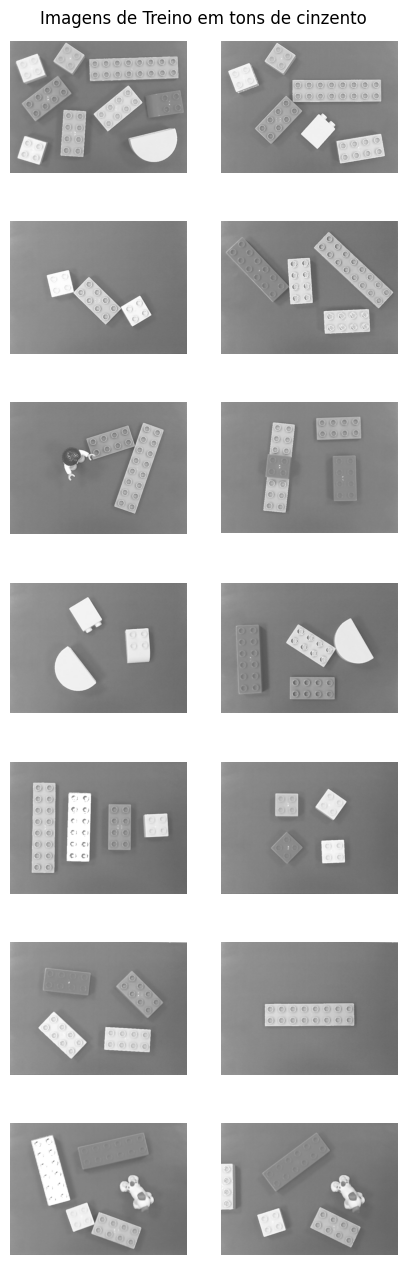

In [4]:
grayscaleImages = []

# Iterar sobre cada imagem a cores e passar para níveis de cinzento
for colorImg in changeImages:
    grayscaleImg = cv2.cvtColor(colorImg, cv2.COLOR_BGR2GRAY)

    grayscaleImages.append(grayscaleImg)



#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(grayscaleImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

In [5]:
colorC = ('b','g','r')
colorN = np.array(['Azul','Verde','Vermelho'])

#valores de quantificação (0-255)
vq = np.arange(0, 256)

#Histograma para cada canal de cor e respetiva imagem para cada canal
#Canal 0 -> Azul
#Canal 1 -> Verde
#Canal 2 -> Vermelho

print(img.shape)

for i,c in enumerate(colorC):
    plt.figure(figsize=(9,3))
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(121)
    plt.bar(vq,np.squeeze(histr),color = c, width = 1)
    plt.title('Histograma do Canal ' +  colorN[i])
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.subplot(122)
    plt.title('Imagem para o Canal ' +  colorN[i])
    plt.imshow(cv2.cvtColor(img[:,:,i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


(530, 706, 3)


<a id='subsubsection2'></a>
### <center><b>Observações sobre a conversão para cinzento e o histograma</b></center>
<div style="text-align: justify">

Com base nos resultados dos histogramas podemos concluir o seguinte:

Os histogramas dos canais azul e verde apresentam uma distribuição extensa e com múltiplos picos. No canal azul, a presença significativa de tons claros (valores de intensidade entre 150 e 250) faz com que haja pouca distinção entre as peças de Lego e o fundo. No caso do canal verde, a variação entre valores médios (de 50 a 200) também não oferece um contraste claro entre os objetos e o fundo. Nas imagens correspondentes a esses canais, podemos observar que as peças se confundem mais com o fundo, principalmente as peças vermelhas. Essas características tornam os canais azul e verde menos adequados para uma binarização eficaz.

Por outro lado, o canal vermelho apresenta um histograma com uma separação muito mais clara entre os tons escuros e claros, com um grande pico próximo de 50 e outro em torno de 250. Isso indica um contraste mais forte entre as peças e o fundo, proporcionando uma imagem com contornos bem definidos e uma clara distinção entre os objetos. Essa separação é fundamental para uma binarização precisa, facilitando a segmentação das peças de Lego. Por essas razões, o canal vermelho é o mais adequado para continuar o processo de binarização e segmentação, sendo assim como iremos prosseguir com o nosso trabalho.


***
<a id='subsection4'></a>
# <center><b>Binarização</b></center>
<div style="text-align: justify">

Este passo trata-se do processo de divisão dos bits das imagens em dois grupos, 1 e 0, sendo normalmente o valor 0 reservado para os valores abaixo do valor da divisão e 1 para os valores acima da divisão.

Para o nosso projeto o resultado desta divisão será o background da imagem a preto e as peças a branco, algo que irá ajudar depois na classificação dos objetos por já não ser preciso diferenciar entre objetos e o fundo da imagem.

Para a binarização foi utilizada a função da biblioteca OpenCV threshold utilizando o threshold binario e o threshold de Otsu

### Método de Otsu

O método de Otsu é muito usado para binarização automática de imagens, que define o threshold ideal sem necessidade de intervenção manual. Ele funciona gerando o histograma da imagem e dividindo os pixels em duas classes: fundo (pixels com intensidades abaixo do limiar) e objeto (pixels com intensidades acima do limiar). O objetivo é encontrar o threshold que minimize a variância intra-classes, definida como a soma das variâncias das duas classes. O Otsu realiza uma busca exaustiva por todos os valores do limiar, calculando a variância de cada divisão e selecionando o valor que separa melhor as classes.

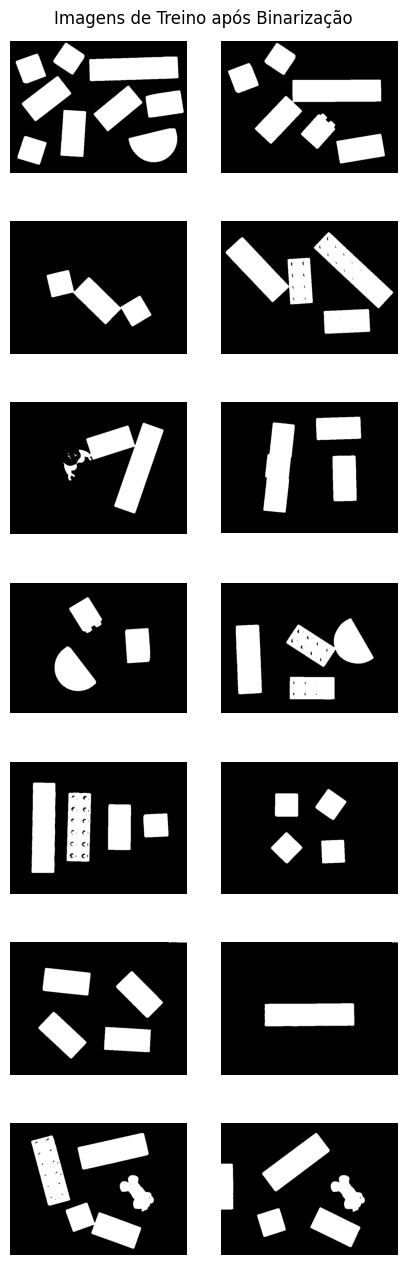

In [6]:
binImages = []
i = 1
for image in changeImages:
    # Suavização da imagem no canal vermelho
    aux = cv2.GaussianBlur(image[:,:,2],(5,5),0)
    # aux = image[:,:,2]
    res, thresh = cv2.threshold(aux,86,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    binImages.append(thresh)
    i+=1

plt.figure(figsize=(5,16))
plt.title("Imagens de Treino após Binarização")
plt.axis('off')

for i, image in enumerate(binImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

<a id='subsubsection4'></a>
### <center><b>Observações sobre o processo de binarização</b></center>
<div style="text-align: justify">

Observando as imagens em cima, é possível perceber que a binarização permitiu distinguir de forma eficaz as peças de Lego do fundo azul da imagem. No entanto, algumas observações importantes podem ser feitas.

Primeiro, nota-se que algumas peças de Lego não foram completamente binarizadas em branco, apresentando áreas escuras ou incompletas, o maior exemplo disto é a peça azul da imagem 9 onde apresenta várias áreas escuras nas partes redondas da peça. Isto pode indicar uma limitação no threshold aplicado.

Segundo, observa-se que em algumas imagens, certas peças estão conectadas ou sobrepostas a outras, resultando em regiões contínuas de pixeís brancos. Este efeito de "conexão" entre peças pode dificultar a contagem e identificação correta das peças individuais, pois assim duas peças individuais passam a contar como uma só. Sendo assim, necessário aplicar técnicas adicionais de processamento, como operações morfológicas que serão aplicadas a seguir, para separá-las adequadamente.

***
<a id='subsection5'></a>
# <center><b>Operações morfológicas</b></center>
<div style="text-align: justify">

Neste passo iremos tentar resolver o problema das conexões entre os objetos, encontrados na binarização das imagens.

Para isso iremos utilizar a biblioteca OpenCV recorrendo a funções para operações morfológicas.

Estas funções podem ser utilizadas para aumentar ou diminuir o tamanho dos objetos, utilizando um elemento estruturante, que define a vizinhança a ser examinada em cada píxel.

### Funções utilizadas:

#### cv2.erode é utilizada para diminuir objetos de modo a ser possivel separar as peças.

#### cv2.dilate é utilizada para que as peças voltem a ter um tamanho perto do seu original.

#### cv2.MORPH_GRADIENT é utilizado para que as peças fiquem apenas com o contorno das peças.

Para as primeiras duas funções foi utilizado uma forma retangular para se poder assimilar às peças de lego.

Para a MORPH_GRADIENT foi utilizado uma cruz. Foi utilizada uma cruz por ser a que dava melhores resultados após testes com vários elementos estruturantes.

In [7]:
## Tentativa 1

## Implementação Final
morphImages = []
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))

i = 0

for binImage in binImages:
    morph = cv2.erode(binImage, kernel, iterations=3)

    morph = cv2.dilate(morph, kernel, iterations=1)
    morph = cv2.erode(morph,  cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)), iterations=1)
    # morph = cv2.morphologyEx(binImage,cv2.MORPH_HITMISS,kernel,1)
    morphImages.append(morph)
    i+=1

#Representação das imagens de treino
plt.figure(figsize=(10,10))
plt.title("Imagens de Treino após operações morfologicas")
plt.axis('off')

for i, image in enumerate(morphImages):
    plt.subplot(4, 4, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

Esta implementação de operações morfológicas foi quase ótima pois os contornos resultantes destas eram quase perfeitos. Mas esta implementação não foi a implementação final, pois não foi suficientemente eficaz ao ponto de separar a peça de Lego e o objeto na imagem 8 e criou "buracos" na imagem 9 na peça azul, o que resultava numa contagem errada de objetos pois a peça azul continha 2 objetos dentro dela.

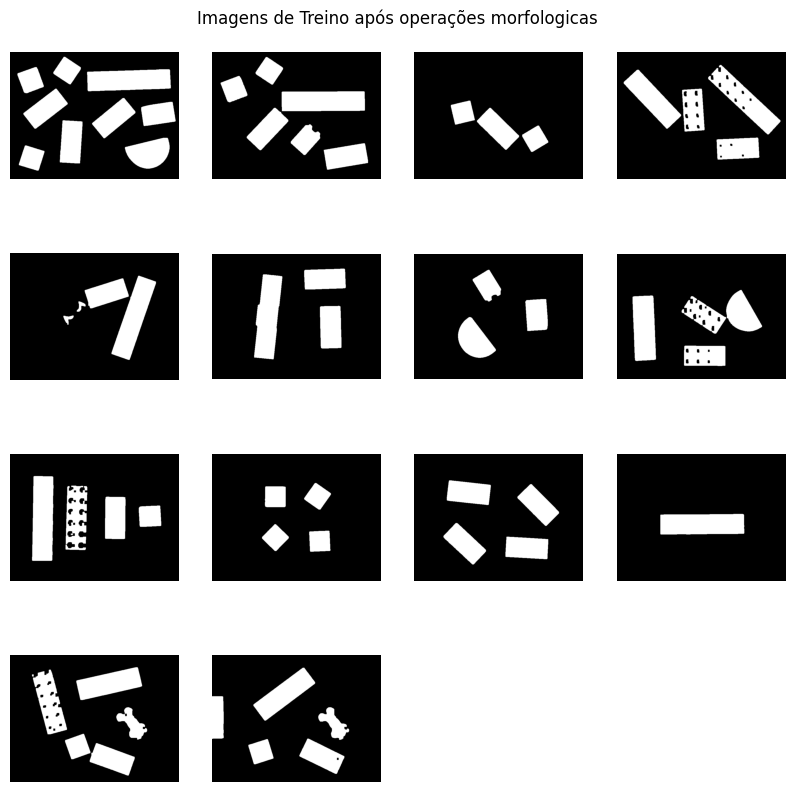

In [8]:
## Tentativa 2

## Implementação Final
morphImages = []
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))

i = 0

for binImage in binImages:
    morph = cv2.erode(binImage, kernel, iterations=3)

    morph = cv2.dilate(morph, kernel, iterations=1)
    #morph = cv2.erode(morph,  cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)), iterations=1)
    
    morph = cv2.morphologyEx(morph,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_RECT,(6,6)),3)
    #morph = cv2.morphologyEx(morph,cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_RECT,(4,4)),1)

    morphImages.append(morph)
    i+=1

#Representação das imagens de treino
plt.figure(figsize=(10,10))
plt.title("Imagens de Treino após operações morfologicas")
plt.axis('off')

for i, image in enumerate(morphImages):
    plt.subplot(4, 4, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

Novamente esta implementação também foi quase perfeita, mas na imagem 8 na peça azul há um pequeno pormenor onde no canto superior esquerdo há um pequeno quadrado branco que conta como um objeto e por esse problema não seguimos o trabalho com esta implementação.

In [9]:
## Implementação Final
morphImages = []
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))

i = 0

for binImage in binImages:
    #Erosão da imagem 6 vezes
    morph = cv2.erode(binImage, kernel, iterations=6)
    #Dilatação da imagem 4 vezes
    morph = cv2.dilate(morph, kernel, iterations=4)
    #Obter os contornos das peças
    morph = cv2.morphologyEx(morph,cv2.MORPH_GRADIENT,cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)),1)
    morphImages.append(morph)
    i+=1

#Representação das imagens de treino
plt.figure(figsize=(10,10))
plt.title("Imagens de Treino após operações morfologicas")
plt.axis('off')

for i, image in enumerate(morphImages):
    plt.subplot(4, 4, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

Esta foi a implementação final das operações morfológicas, apesar das suas formas irregulares obtém os resultados pretendidos na separação de objetos conexos e não cria "buracos" que possam causar erros na contagem dos objetos.

<a id='subsubsection5'></a>
### <center><b>Observações sobre as operações morfológicas</b></center>
<div style="text-align: justify">

Ao estudar as imagens é possivel observar que as peças que estavam ligadas entre si já estão neste momento separadas.

Existiu problemas em algumas peças em que perdiam o seu formato retangular e esse problema irá ser resolvido no próximo passo deste trabalho.

***
<a id='subsection6'></a>
# <center><b>Extracção de componentes conexos e prioridades</b></center>
<div style="text-align: justify">

Nesta parte do trabalho iremos abordar a extração de componentes, que envolve o reconhecimento e a extração dos contornos dos objetos conectados. Este passo será aplicado a todos os objetos e não só às peças de Lego.

 Para extrair os contornos, utilizaremos o método <b>cv2.findContours</b> da biblioteca OpenCV. Este método permite escolher entre diferentes modos, que incluem as seguintes opções: <br><br> <b>- cv2.RETR_EXTERNAL:</b> Extrai apenas os limites externos;<br> <b>- cv2.RETR_CCOMP:</b> Extrai os limites internos e externos, organizando-os em uma hierarquia bidimensional;<br> <b>- cv2.RETR_TREE:</b> Extrai tanto limites internos quanto externos, organizando-os em forma de árvore;<br> <b>- cv2.RETR_LIST:</b> Extrai todos os contornos sem estabelecer relações entre eles.

Optamos pelo primeiro modo: cv2.RETR_EXTERNAL, pois como este só extrai os limites externos obtivemos melhores resultados porque não permitia a existência de contornos dentro das peças de Lego, nomeadamente as partes redondas. Assim, os outros 3 modos obtiam piores resultados pois tinham em conta os limites internos.  O parâmetro cv2.CHAIN_APPROX_SIMPLE será utilizado para comprimir os contornos, retornando apenas os pontos essenciais para desenhar a linha do contorno.

<br/>
<br/>

Para alcançar esses objetivos, foram desenvolvidas funções específicas que analisam os contornos das peças de LEGO, utilizando métricas como aspect ratio e a circularidade para filtrar as peças válidas.

A função get_properties_lego começar por identificar os contornos que não possuem pais na hierarquia, excluindo assim objetos contidos dentro de outros. Em seguida, calcula o aspect ratio, áreas, retângulos delimitadores e momentos dos contornos, além de determinar os centroides das peças.

A circularidade é medida por meio das funções calculate_mu_r, calculate_sigma_r e calculate_c2, que avaliam a distância radial média e o desvio padrão das distâncias radiais em relação ao centroide, permitindo quantificar a circularidade de cada contorno.

Finalmente, as peças de LEGO são filtradas com base em critérios específicos de circularidade e aspect ratio, resultando na seleção apenas daquelas que atendem aos requisitos estabelecidos.

In [10]:
def distanciaRadialMedia(points, center):
    """
    Calcula a distância radial média dos pontos em relação a um centro.

    @param points: Lista de coordenadas dos pontos do contorno.
    @param center: Coordenadas do centro (centroide).

    @return: A distância radial média.
    """
    K = len(points)  # Número de pontos
    radial_distances = [np.linalg.norm(np.array(point) - np.array(center)) for point in points]
    mu_r = sum(radial_distances) / K  # Distância radial média
    return mu_r

def desvioPadraoDistRadial(points, center, mu_r):
    """
    Calcula o desvio padrão das distâncias radiais dos pontos em relação a um centro.

    @param points: Lista de coordenadas dos pontos do contorno.
    @param center: Coordenadas do centro (centroide).
    @param mu_r: A distância radial média.

    @return: O desvio padrão das distâncias radiais.
    """
    K = len(points)  # Número de pontos
    radial_distances = [np.linalg.norm(np.array(point) - np.array(center)) for point in points]
    sigma_r = np.sqrt(sum([(distance - mu_r) ** 2 for distance in radial_distances]) / K)
    return sigma_r

def circularidadeC2(points, center):
    """
    Calcula a medida de circularidade C2 para um conjunto de pontos.

    @param points: Lista de coordenadas dos pontos do contorno.
    @param center: Coordenadas do centro (centroide).

    @return: A medida de circularidade C2.
    """
    mu_r = distanciaRadialMedia(points, center)
    sigma_r = desvioPadraoDistRadial(points, center, mu_r)
    if sigma_r == 0:  # Evitar divisão por zero
        return 0
    C2 = mu_r / sigma_r  # Medida de circularidade
    return C2

def get_aspect_ratio(contour):
    """
    Calcula a razão de aspecto de um contorno.

    @param contour: Contorno para o qual a razão de aspecto será calculada.

    @return: A razão de aspecto (largura / altura).
    """
    x, y, w, h = cv2.boundingRect(contour)
    return float(w) / h

def get_properties_lego(contours, hierarchy):
    """
    Processa os contornos para identificar e filtrar peças de LEGO com base em razão de aspecto e circularidade.

    @param contours: Lista de contornos detectados nas imagens.
    @param hierarchy: Hierarquia dos contornos.

    @return: Uma tupla contendo:
             - valid_legos: Array de booleanos indicando se as peças são válidas.
             - areas: Lista de áreas dos contornos.
             - moments: Lista de momentos dos contornos.
             - centroids: Lista de coordenadas dos centroides.
             - bounding_rects: Lista de retângulos delimitadores dos contornos.
    """
    # Filtrar contornos que não têm pais
    no_parents = np.bitwise_and(hierarchy[:, :, 2] == -1, hierarchy[:, :, 3] == -1).flatten()

    # Calcular propriedades dos contornos
    aspect_ratios = [get_aspect_ratio(cont) for cont in contours]
    areas = [cv2.contourArea(cont) for cont in contours]
    bounding_rects = [cv2.boundingRect(cont) for cont in contours]
    moments = [cv2.moments(cont) for cont in contours]

    # Calcular centroides
    centroids = []
    for moment in moments:
        if moment["m00"] != 0:
            cX = int(moment["m10"] / moment["m00"])
            cY = int(moment["m01"] / moment["m00"])
            centroids.append((cX, cY))
        else:
            centroids.append(None)

    # Calcular circularidade para cada contorno
    valoresCircularidade = []
    for i, cont in enumerate(contours):
        if centroids[i]:  # Verificar se o centroide é válido
            points = cont.squeeze(axis=1)  # Extrair pontos do contorno
            valoresCircularidade.append(circularidadeC2(points, centroids[i]))
        else:
            valoresCircularidade.append(None)

    # Filtrar peças com base na circularidade
    circularity_threshold_min1 = 0  # Limite mínimo para formas retangulares
    circularity_threshold_max1 = 5.06  # Limite superior para valores de circularidade
    circularity_threshold_min2 = 5.20  # Limite mínimo para formas retangulares
    circularity_threshold_max2 = 5.33  # Limite superior para valores de circularidade
    circularity_threshold_min3 = 6  # Limite mínimo para formas retangulares
    circularity_threshold_max3 = 12  # Limite superior para valores de circularidade
    valid_legos_by_circularity = [
        (circularity_threshold_min1 < valoresCircularidade[i] < circularity_threshold_max1 or
         circularity_threshold_min2 < valoresCircularidade[i] < circularity_threshold_max2 or
         circularity_threshold_min3 < valoresCircularidade[i] < circularity_threshold_max3)
        for i in range(len(contours))
    ]

    # Combinar filtros para identificar peças válidas
    valid_legos = np.bitwise_and(no_parents, valid_legos_by_circularity)

    return valid_legos, areas, moments, centroids, bounding_rects


Imagem número 1:
Número de peças de LEGO detectadas: 8
Imagem número 2:
Número de peças de LEGO detectadas: 6
Imagem número 3:
Número de peças de LEGO detectadas: 3
Imagem número 4:
Número de peças de LEGO detectadas: 4
Imagem número 5:
Número de peças de LEGO detectadas: 4
Imagem número 6:
Número de peças de LEGO detectadas: 3
Imagem número 7:
Número de peças de LEGO detectadas: 2
Imagem número 8:
Número de peças de LEGO detectadas: 3
Imagem número 9:
Número de peças de LEGO detectadas: 4
Imagem número 10:
Número de peças de LEGO detectadas: 4
Imagem número 11:
Número de peças de LEGO detectadas: 4
Imagem número 12:
Número de peças de LEGO detectadas: 1
Imagem número 13:
Número de peças de LEGO detectadas: 5
Imagem número 14:
Número de peças de LEGO detectadas: 5


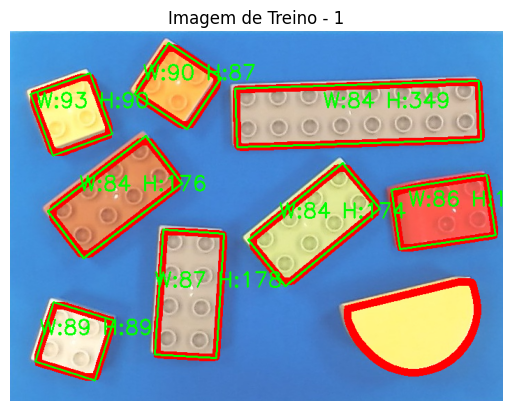

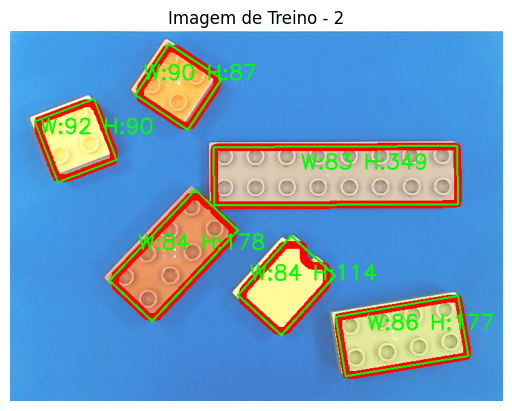

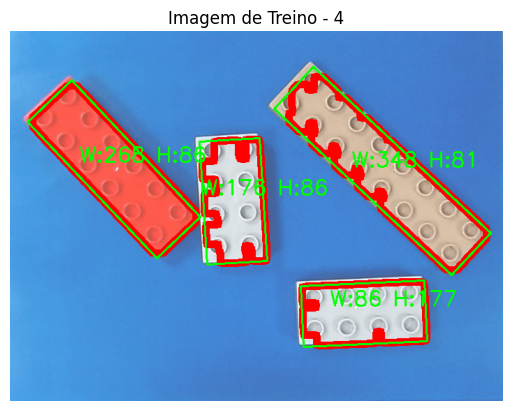

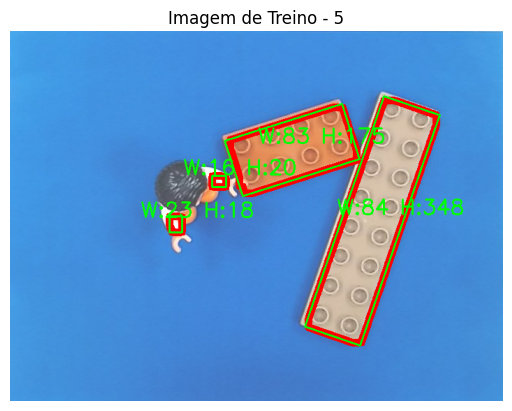

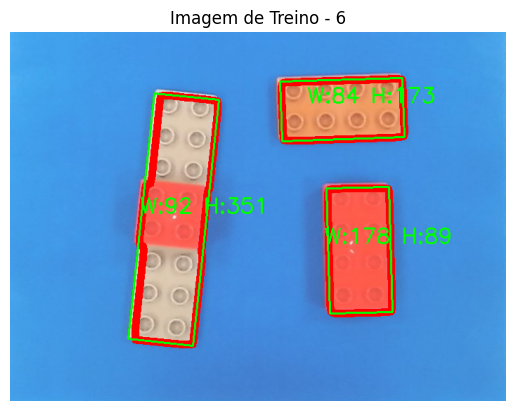

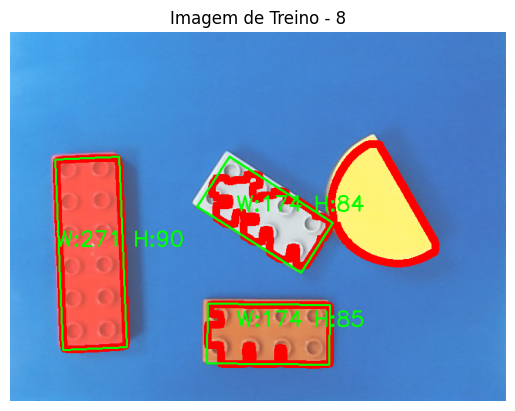

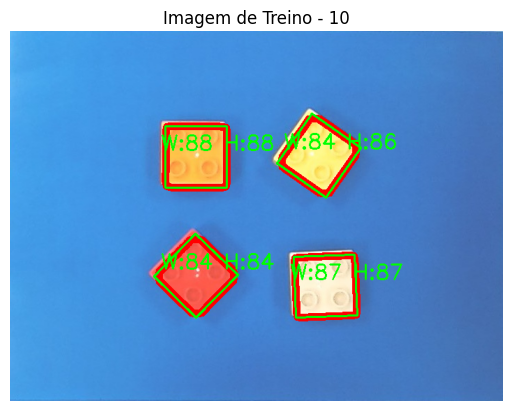

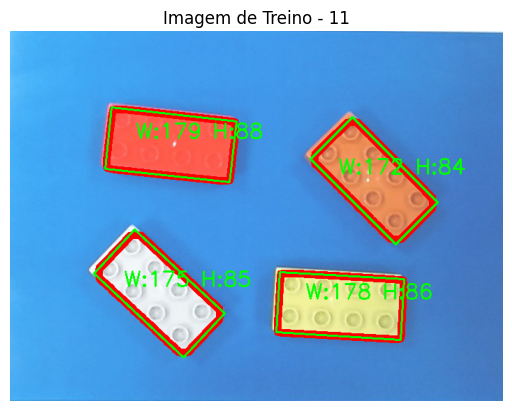

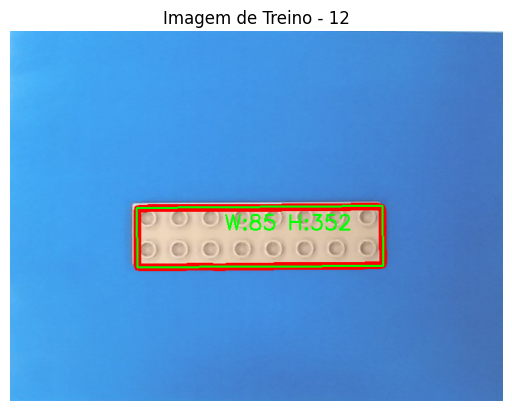

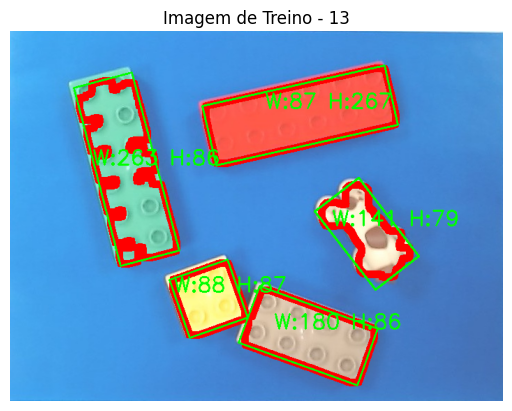

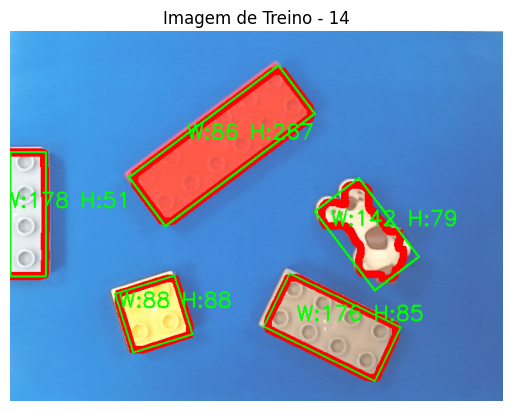

In [11]:
i = 0
for image in morphImages:
    # Encontrar contornos e hierarquia
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Desenhar os contornos
    cv2.drawContours(images[i], contours, -1, (0, 0, 255), 10, hierarchy=hierarchy)

    # Processar os contornos para contar peças de LEGO
    if hierarchy is not None:
        valid_legos, areas, moments, centroids, bounding_rects = get_properties_lego(contours, hierarchy)

        print(f"Imagem número {i+1}:")
        print('Número de peças de LEGO detectadas:', np.sum(valid_legos))

        # Adicionar texto nas peças detectadas
        for j, valid in enumerate(valid_legos):
            if valid and centroids[j] is not None:  # Verificar se é uma peça de LEGO válida
                cX, cY = centroids[j]

                # Get the rotated bounding rectangle (minAreaRect)
                rect = cv2.minAreaRect(contours[j])
                box = cv2.boxPoints(rect)  # Get the four corners of the rotated rectangle
                box = np.int32(box)  # Convert them to integer
                w, h = rect[1]  # Get width and height from minAreaRect
        
                # Draw the rotated rectangle
                cv2.drawContours(images[i], [box], 0, (0, 255, 0), 2)

                # Add the width and height as text on the image
                cv2.putText(images[i], f"W:{int(w)} H:{int(h)}", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # print(f'Peça {j+1} - Largura: {w}, Altura: {h}')

    i += 1

# Representação das imagens de treino com os contornos desenhados
for i, image in enumerate(images[:14]):
    plt.title("Imagem de Treino - " + str(i+1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



<a id='subsubsection6'></a>
### <center><b>Observações sobre os resultados das extrações de componentes</b></center>
<div style="text-align: justify">

- Observando os objetos detetados para cada uma das imagens, verifica-se uma contagem conforme a esperada. Contudo, é importante notar que neste trabalho a classificação das peças é feita somente com base em características geométricas, dito isto na imagem 6, só é possível detetar 3 objetos, mesmo estando 4 presentes. A peça de Lego cinzenta 8x2 e a vermelha de 2x2 colocada por cima serão extraídas como uma peça só, tal como conseguimos ver nestes resultados, e por isso, serão classificadas como uma só, posteriormente, como uma peça de Lego 8x2.

- Na imagem 5 há mais um objeto detetado do que é suposto, pois perdeu-se informação ao longo da binarização e das operações morfológicas acerca do boneco de Lego e o algoritmo deteta somente os braços deste.

***
<a id='subsection7'></a>
# <center><b>Classificação de Objetos</b></center>
<div style="text-align: justify">

<a id='subsubsection7'></a>
### <center><b>Médias dos tamanhos das diferentes peças de lego</b></center>
<div style="text-align: justify">

Com a extração dos componentes foi então possível obter as médias de altura e largura de cada peça para poder ser utilizado na sua classificação.

Foram utilizados os valores dados pela função do OpenCV minAreaRect utilizada para a criação de um retangulo com o tamanho aproximado da peça original e onde pode ser tambem os tamanhos de altura e largura, facilitando o cálculo da média.

In [12]:
print('Peça 2x2')
piece2x2H = [108,111,103,102,98,106,135,90,89,107,104,137]
piece2x2W = [105,108,112,145,109,111,99,86,106,95,96,89,107,90,104,103]
meanH2x2 = np.round(np.mean(piece2x2H),3)
stdH2x2 = np.round(np.std(piece2x2H),3)
meanW2x2 = np.round(np.mean(piece2x2W),3)
stdW2x2 = np.round(np.std(piece2x2W),3)
print('Média altura 2x2: ',meanH2x2)
print('Desvio padrão altura 2x2: ', stdH2x2)
print('Média largura 2x2: ',meanW2x2)
print('Desvio padrão largura 2x2: ', stdW2x2)
print()
print('Peça 4x4')
piece4x4H = [176,174,178,178,177,175,176,177,175,173,178,174,174,177,179,172,178,180,178,176]
piece4x4W = [84,87,86,83,89,90,85,88]
meanH4x4 = np.round(np.mean(piece4x4H),3)
stdH4x4 = np.round(np.std(piece4x4H),3)
meanW4x4 = np.round(np.mean(piece4x4W),3)
stdW4x4 = np.round(np.std(piece4x4W),3)
print('Média altura 2x2: ',meanH4x4)
print('Desvio padrão altura 2x2: ', stdH4x4)
print('Média largura 2x2: ',meanW4x4)
print('Desvio padrão largura 2x2: ', stdW4x4)
print()
print('Peça 6x6')
piece6x6H = [268,271,263,267]
piece6x6W = [86,87,90]
meanH6x6 = np.round(np.mean(piece6x6H),3)
stdH6x6 = np.round(np.std(piece6x6H),3)
meanW6x6 = np.round(np.mean(piece6x6W),3)
stdW6x6 = np.round(np.std(piece6x6W),3)
print('Média altura 2x2: ',meanH6x6)
print('Desvio padrão altura 2x2: ', stdH6x6)
print('Média largura 2x2: ',meanW6x6)
print('Desvio padrão largura 2x2: ', stdW6x6)
print()
print('Peça 8x8')
piece8x8H = [349,348,351,355,352]
piece8x8W = [84,83,81,92,86,85]
meanH8x8 = np.round(np.mean(piece8x8H),3)
stdH8x8 = np.round(np.std(piece8x8H),3)
meanW8x8 = np.round(np.mean(piece8x8W),3)
stdW8x8 = np.round(np.std(piece8x8W),3)
print('Média altura 2x2: ',meanH8x8)
print('Desvio padrão altura 2x2: ', stdH8x8)
print('Média largura 2x2: ',meanW8x8)
print('Desvio padrão largura 2x2: ', stdW8x8)

Peça 2x2
Média altura 2x2:  107.5
Desvio padrão altura 2x2:  14.268
Média largura 2x2:  104.062
Desvio padrão largura 2x2:  13.146

Peça 4x4
Média altura 2x2:  176.25
Desvio padrão altura 2x2:  2.071
Média largura 2x2:  86.5
Desvio padrão largura 2x2:  2.291

Peça 6x6
Média altura 2x2:  267.25
Desvio padrão altura 2x2:  2.861
Média largura 2x2:  87.667
Desvio padrão largura 2x2:  1.7

Peça 8x8
Média altura 2x2:  351.0
Desvio padrão altura 2x2:  2.449
Média largura 2x2:  85.167
Desvio padrão largura 2x2:  3.436


| Lego | Média Altura | Desvio Padrão Altura | Média Largura | Desvio Padrão Largura |
| :-: | :-: | :-: | :-: | :-: |
| 2x2 |  107.5 | 14.268 | 104.062 | 13.146 |
| 2x4 |  176.25 | 2.071 | 86.5 | 2.291 |
| 2x6 |  267.25 | 2.861 | 87.667 | 1.7 |
| 2x8 |  351.0 | 2.449 |85.167 | 3.436 |



Foi então criado um dicionário com a média das alturas de cada peça +/- 2.2* desvio padrão para obter um intervalo de valores que funcionasse para todos os objetos das imagens de treino.

In [13]:
#média+/-desvioPadrão*2.2
dic_Height = {
    '2x2':[76.124,138.89],
    '4x2':[171.694,180.806],
    '6x2':[260.956,273.544],
    '8x2':[345.612,356.388],
}
dic_Width = {
    '2x2':[92.573,117.961],
    '4x4':[84.209,88.791],
    '6x6':[85.967,89.367],
    '8x8':[81.731,88.603],
}


### Explicação das funções

get_text verifica primeiro se a peça que recebeu é logo um lego ou não de acordo com a classificação anteriormente dada utilizando a circularidade e que a sua altura está de acordo com os valores calculados para a média +/- o desvio padrão.

Caso passe este teste compara a sua altura com o dicionário e é atribuido um string de acordo com o resultado.

classificador recebe a imagem, um array com o número de peças existente na imagem, um array com as suas alturas e os moments com o centro do contour. Com estes valores cada peça é classificada utilizando a função get_text e escrevendo na imagem o que cada peça é e no final o número de peças para cada dimensão diferente.

In [14]:
def get_text(piece,height):
    if not piece or not (76.124<=height<=138.89) and not (171,694<=height<=180.806) and not(260.956<=height<=273.544) and not(345.612<=height<=356.388):
        return 'object'
    for key, value in dic_Height.items():
        if(value[0]<=height<=value[1]):
            # print(value[0] ,' ',height,' ',value[1])  
            return key
    return 'object'

def classificador(img, pieces,height,moments):
    numberOfLegos = 0
    i = 0
    arrayPeças = [0,0,0,0]
    for piece in pieces:
        moment = moments[i]

        text = get_text(piece,height[i])
        i+=1
        if(text!='object'):
            numberOfLegos+=1

        x = int(moment['m10']/moment['m00']) - len(text)*9
        y = int(moment['m01']/moment['m00'])

        #insere o texto na imagem
        imgClassification = cv2.putText(img, text, (int(x), int(y)), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 1.3, color = (0,0,0), thickness = 2, lineType = cv2.LINE_AA)
        if text == '2x2':
            arrayPeças[0]+=1
        elif text == '4x2':
            arrayPeças[1]+=1
        elif text == '6x2':
            arrayPeças[2]+=1
        elif text == '8x2':
            arrayPeças[3]+=1
    imgClassification = cv2.putText(img,f'Pecas 2x2: {arrayPeças[0]}', (0,20), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 0.7, color = (0,0,255), thickness = 1, lineType = cv2.LINE_AA)
    imgClassification = cv2.putText(img,f'Pecas 4x2: {arrayPeças[1]}', (0,40), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 0.7, color = (0,0,255), thickness = 1, lineType = cv2.LINE_AA)
    imgClassification = cv2.putText(img,f'Pecas 6x2: {arrayPeças[2]}', (0,60), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 0.7, color = (0,0,255), thickness = 1, lineType = cv2.LINE_AA)
    imgClassification = cv2.putText(img,f'Pecas 8x2: {arrayPeças[3]}', (0,80), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 0.7, color = (0,0,255), thickness = 1, lineType = cv2.LINE_AA)

    return imgClassification, numberOfLegos

<a id='subsubsection8'></a>
### <center><b>Teste das funções de classificador</b></center>
<div style="text-align: justify">

Número total de peças da imagem: 8


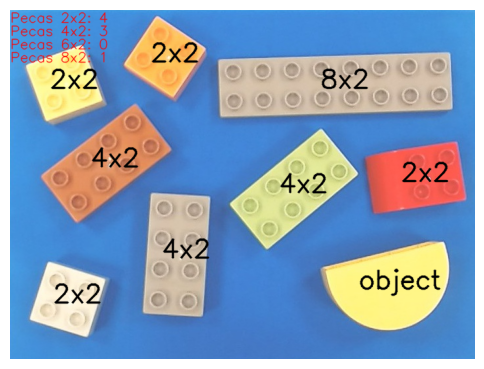

In [15]:
imagesNew = []
#Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

#Ler as imagens de treino e adicionar ao array 'images'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        imagesNew.append(img)
    else:
        print("Unable to read image:", image_file)


contours, hierarchy = cv2.findContours(morphImages[0],cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
if(hierarchy is not None):
    validLegos, areas, moments,centroids, bounding_rects = get_properties_lego(contours,hierarchy)
    height = []
    for contour in contours:
        rect = cv2.minAreaRect(contour)
        w, h = rect[1]  # Get width and height from minAreaRect
        if h>=w:
            height.append(h)
        else:
            height.append(w)

    classImage, numberOfLegos = classificador(imagesNew[0],validLegos,height,moments)
    print('Número total de peças da imagem:', numberOfLegos)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(classImage,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



É possível observar neste teste que o teste de classificação foi bem sucedido, pois a máquina identificou 3 peças de 4x2, 4 peças de 2x2, 1 peça de 8x2 e um objeto, o que era esperado deste teste. Assim, passamos agora ao último teste, onde iremos realizar o teste de classificação para todas as imagens de treino e verificar se a máquina está pronta para testes ou não.

***
<a id='subsection8'></a>
# <center><b>Teste final e resultados</b></center>
<div style="text-align: justify">

Este ultimo passo será o passo onde se irá testar o classificador com todas as imagens de treino.

É possivel observar os resultados esperados na próxima tabela:

| Imagem | Número total de objetos  | 2x2 | 4x2 | 6x2 | 8x2 | Objetos |    
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 9 | 4 | 3 | 0 | 1 | 1
| 2 | 6 | 2 | 2 | 0 | 1 | 1
| 3 | 3 | 2 | 1 | 0 | 0 | 0
| 4 | 4 | 0 | 2 | 0 | 2 | 0
| 5 | 3 | 0 | 1 | 0 | 1 | 1
| 6 | 3 | 0 | 2 | 0 | 1 | 0
| 7 | 3 | 1 | 0 | 0 | 0 | 2
| 8 | 4 | 0 | 2 | 0 | 0 | 1
| 9 | 4 | 1 | 1 | 1 | 1 | 0
| 10 | 4 | 4 | 0 | 0 | 0 | 0
| 11 | 4 | 0 | 4 | 0 | 0 | 0
| 12 | 1 | 0 | 0 | 0 | 1 | 0
| 13 | 5 | 1 | 1 | 1 | 1 | 1
| 14 | 5 | 1 | 2 | 0 | 1 | 1


Imagem: 1
Número de Legos detectados: 8
Valor esperado: 8


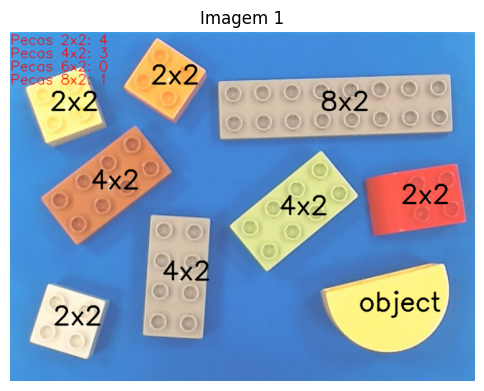


Imagem: 2
Número de Legos detectados: 6
Valor esperado: 6


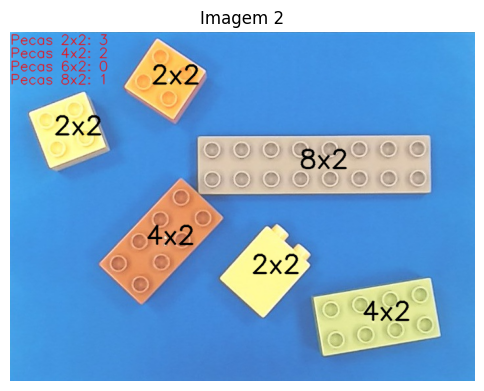


Imagem: 3
Número de Legos detectados: 3
Valor esperado: 3


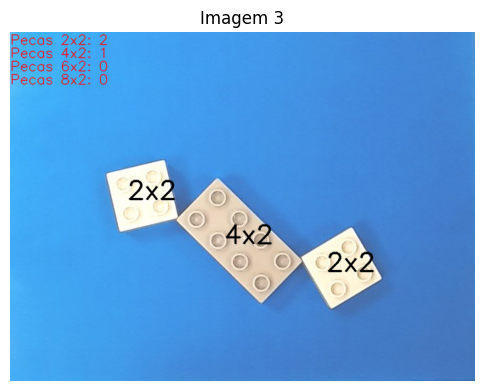


Imagem: 4
Número de Legos detectados: 4
Valor esperado: 4


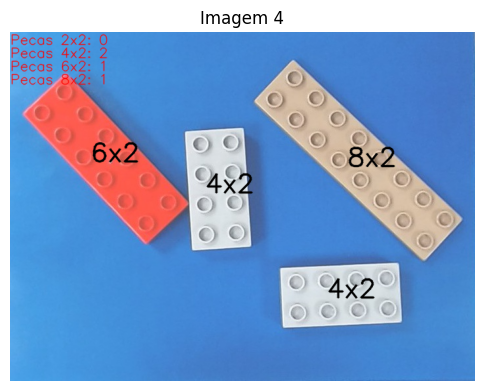


Imagem: 5
Número de Legos detectados: 2
Valor esperado: 2


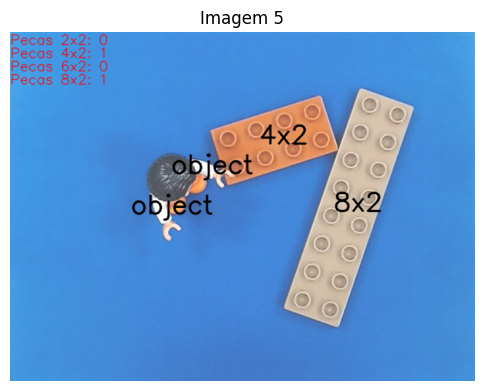


Imagem: 6
Número de Legos detectados: 3
Valor esperado: 3


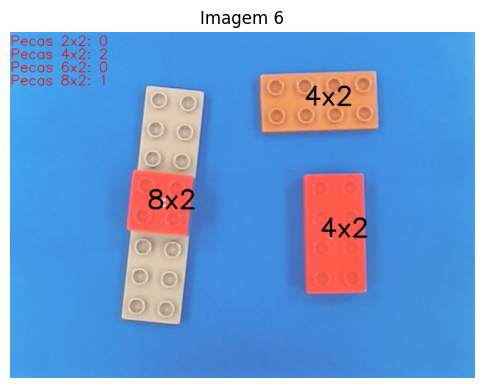


Imagem: 7
Número de Legos detectados: 2
Valor esperado: 2


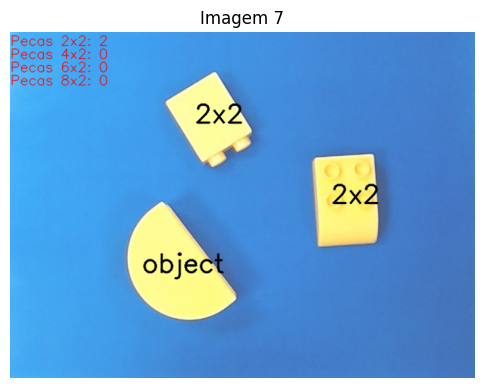


Imagem: 8
Número de Legos detectados: 3
Valor esperado: 3


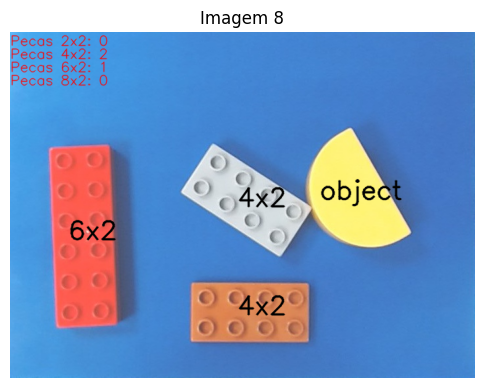


Imagem: 9
Número de Legos detectados: 4
Valor esperado: 4


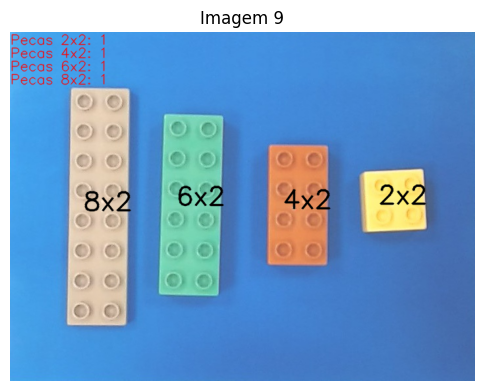


Imagem: 10
Número de Legos detectados: 4
Valor esperado: 4


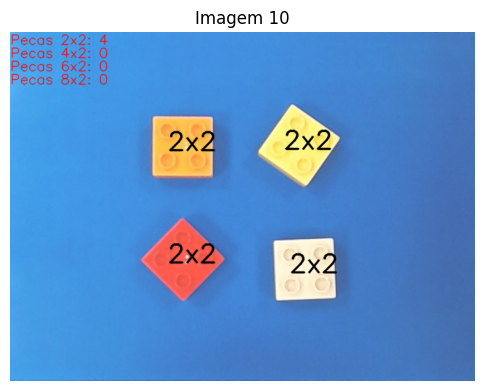


Imagem: 11
Número de Legos detectados: 4
Valor esperado: 4



Imagem: 12
Número de Legos detectados: 1
Valor esperado: 1



Imagem: 13
Número de Legos detectados: 4
Valor esperado: 4



Imagem: 14
Número de Legos detectados: 4
Valor esperado: 4


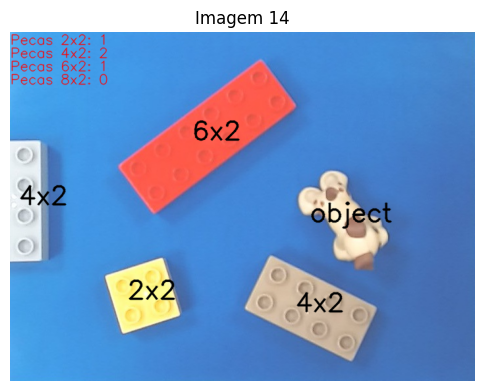

In [16]:
imagesNew = []

peças =[8,6,3,4,2,3,2,3,4,4,4,1,4,4]


# Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Ler as imagens de treino e adicionar ao array 'imagesNew'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        imagesNew.append(img)
    else:
        print("Unable to read image:", image_file)

# Loop over all images in imagesNew
for i, img in enumerate(imagesNew):
    # Encontrar contornos e hierarquia para cada imagem em morphImages
    contours, hierarchy = cv2.findContours(morphImages[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if hierarchy is not None:
        validLegos, areas, moments, centroids, bounding_rects = get_properties_lego(contours, hierarchy)
        height = []
        for contour in contours:
            rect = cv2.minAreaRect(contour)
            w, h = rect[1]  # Get width and height from minAreaRect
            height.append(h if h >= w else w)  # Append the larger dimension

        # Classificar a imagem e contar o número de peças LEGO
        classImage, numberOfLegos = classificador(img, validLegos, height, moments)

        print("\nImagem: " + str(i + 1) + '\nNúmero de Legos detectados: ' + str(numberOfLegos)+ '\nValor esperado: ' + str(peças[i]))

        # Exibir a imagem processada
        plt.figure(figsize=(6, 6))
        plt.title(f"Imagem {i + 1}")
        plt.imshow(cv2.cvtColor(classImage, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

Analisando os resultados podemos concluir que o classificador funciona corretamente. Isto significa que o classificador consegue distinguir diferentes tipos de peças de Lego, consegue distinguir o que é realmente uma peça de lego e não e consegue, também, identificar peças adjacentes. Assim, podemos concluir que está suficientemente treinado e pronto para testes.

***
<a id='section3'></a>
# <center><b>Conclusão</b></center>
<div style="text-align: justify">

Em conclusão, este primeiro trabalho prático permitiu-nos aplicar tanto os conceitos teóricos lecionados em aula como os exercicios práticos sobre contagem e classificação de peças de Lego retangulares.

Foi possivel aprofundar o conhecimento de várias bibliotecas python como o OpenCV e o Numpy de modo a ser possivel realizar os diversos passos necessários para o bom funcionamento do trabalho.

Existiram algumas dificuldades na realização do trabalho como nos operadores morfológicos onde algumas peças perderam um bocado das suas caracteristicas e na extração dos contornes nas diversas imagens por termos perdido algum tempo a tentar que, na imagem 6, a peça 2x2 por cima da peça 8x2 fosse tambem reconhecida.

Passadas estas dificuldades sentimos que realizamos um bom trabalho funcional para todas as imagens de treino e o classificador pode passar à fase de teste.

***
<a id='section4'></a>
# <center><b>Bibliografia</b></center>
<div style="text-align: justify">


[Slides da unidade curricular disponibilizados pelos docentes;](https://2425moodle.isel.pt/course/view.php?id=8502)\
[Documentação OpenCV;](https://docs.opencv.org/4.x/index.html)
